In [1]:
from scipy.special import expit
xL=[0.25,7,9,20]
for x in xL:
    print(x, 'input x를 sigmoid로 계산한 결과 ==', expit(x))

0.25 input x를 sigmoid로 계산한 결과 == 0.5621765008857981
7 input x를 sigmoid로 계산한 결과 == 0.9990889488055994
9 input x를 sigmoid로 계산한 결과 == 0.9998766054240137
20 input x를 sigmoid로 계산한 결과 == 0.9999999979388463


[0.5621765008857981, 0.9990889488055994, 0.9998766054240137, 0.9999999979388463]


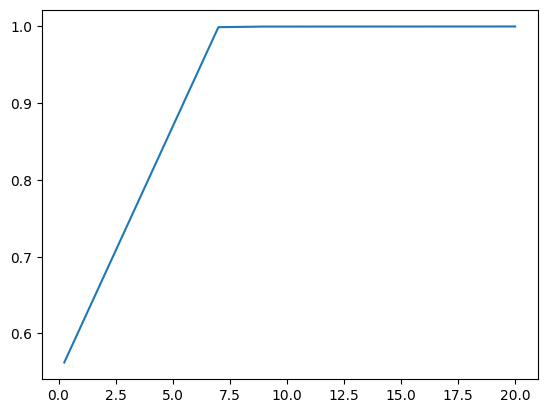

In [2]:
import numpy as np
xList = [0.25,7,9,20]
yList=[]
for x값 in xList:
    yList.append(1/ (1+np.exp(-x값)))
print(yList)

import matplotlib.pyplot as plt
plt.plot(xList,yList)

In [3]:
### 샘플

import pandas as  pd
roomCnt=[1,2,1,1,2,1,3,4]  # 방갯수
year=[2001,1997,1998,2020,1994,1999,2000,2010] #건축년도
재건축여부=[1,0,0,1,1,1,1,0]

df=pd.DataFrame({'방갯수':roomCnt,'건축년도':year,'재건축여부':재건축여부})

df['건축년도']=df['건축년도']/2000      #스케일링,표준화,정규화
df['건축년도']=df['건축년도'].astype('int32')    # 정수값으로 변환

x=df[['방갯수','건축년도']].values
y=df['재건축여부'].values
df

,방갯수,건축년도,재건축여부
0,1,1,1
1,2,0,0
2,1,0,0
3,1,1,1
4,2,0,1
5,1,0,1
6,3,1,1
7,4,1,0


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1234)  # w값 바꾸지 않기 위해 사용함
input_layer = tf.keras.layers.InputLayer(input_shape=(2,))
output_layer= tf.keras.layers.Dense(units=1,activation='sigmoid')

model = keras.Sequential([input_layer,output_layer])
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
print(model.fit(x, y))
model.summary()  # 구축된 레이처층을 보여줌

1/1 [==============================] - 1s 1s/step - loss: 0.7385 - accuracy: 0.2500
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
tmp=tf.keras.Model(inputs=model.input, 
                outputs=model.layers[0].output)(x)
tmp 

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[0.43392918],
       [0.55593234],
       [0.5284482 ],
       [0.43392918],
       [0.55593234],
       [0.5284482 ],
       [0.48891923],
       [0.5165998 ]], dtype=float32)>

In [6]:
model.get_weights()

[array([[ 0.11075377],
        [-0.37975395]], dtype=float32),
 array([0.00316227], dtype=float32)]

In [7]:
#model.get_config()
w=model.get_weights()[0]
b=model.get_weights()[1]

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1234)  # w값 바꾸지 않기 위해 사용함
input_layer = tf.keras.layers.InputLayer(input_shape=(2,))
hi=tf.keras.layers.Dense(units=1,activation='relu')
output_layer= tf.keras.layers.Dense(units=1,activation='sigmoid')

model = keras.Sequential([input_layer,hi,output_layer])
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
print(model.fit(x, y))
model.summary()  # 구축된 레이처층을 보여줌

1/1 [==============================] - 0s 234ms/step - loss: 0.6920 - accuracy: 0.3750
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
tmp=tf.keras.Model(inputs=model.input, 
                   outputs=model.layers[0].output)(x)
tmp 

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[0.        ],
       [0.22466981],
       [0.11391602],
       [0.        ],
       [0.22466981],
       [0.11391602],
       [0.        ],
       [0.06642342]], dtype=float32)>

In [12]:
model.get_weights()

[array([[ 0.11075378],
        [-0.37975395]], dtype=float32),
 array([0.00316224], dtype=float32),
 array([[-0.60811526]], dtype=float32),
 array([0.00316227], dtype=float32)]

In [14]:
tmp=tf.keras.Model(inputs=model.input, 
                   outputs=model.layers[1].output)(x)
tmp 

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[0.5007906 ],
       [0.46668372],
       [0.4834781 ],
       [0.5007906 ],
       [0.46668372],
       [0.4834781 ],
       [0.5007906 ],
       [0.49069336]], dtype=float32)>

In [15]:
print(model.predict(x))

[[0.5007906 ]
 [0.46668372]
 [0.4834781 ]
 [0.5007906 ]
 [0.46668372]
 [0.4834781 ]
 [0.5007906 ]
 [0.49069336]]


In [16]:
# binary_crossentropy 값 출력
print('-'*300)
model.evaluate(x, y)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 98ms/step - loss: 0.6909 - accuracy: 0.7500


[0.6909422874450684, 0.75]

In [17]:
### binary-crossentropy(직접계산한값)
yhat=model.predict(x)
y=y.reshape(8,1)
err=y * np.log(yhat) + (1 - y) * np.log(1 - yhat)
-np.mean(err)

0.6909422054886818

## SOFTMAX

In [18]:
# 문자열을 숫자로 변환해주는 모듈
from sklearn.preprocessing import LabelEncoder

yList=['가방','가방','신발','핸드폰','티셔츠','핸드폰']
e = LabelEncoder()
e.fit(yList)
ydata=e.transform(yList)
ydata

array([0, 0, 1, 3, 2, 3])

In [19]:
import numpy as np
np.unique(ydata), len(np.unique(ydata))

(array([0, 1, 2, 3]), 4)

In [20]:
import tensorflow as tf
y_encoded = tf.keras.utils.to_categorical(ydata)
y_encoded

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [23]:
output_layer= tf.keras.layers.Dense(units=4,activation='softmax')

model = keras.Sequential([input_layer,output_layer])
model.compile(loss='categorical_crossentropy',   
                metrics=['accuracy'])

In [24]:
### 샘플

import pandas as  pd
roomCnt=[1,2,1,1,2,1,3,4]  # 방갯수
year=[2001,1997,1998,2020,1994,1999,2000,2010] #건축년도
재건축여부등급=['A','B','A','A','C','A','A','B']

df=pd.DataFrame({'방갯수':roomCnt,'건축년도':year,'재건축여부등급':재건축여부등급})

df['건축년도']=df['건축년도']/2000      #스케일링,표준화,정규화
df['건축년도']=df['건축년도'].astype('int32')    # 정수값으로 변환

x=df[['방갯수','건축년도']].values
y=df['재건축여부등급'].values
df

,방갯수,건축년도,재건축여부등급
0,1,1,A
1,2,0,B
2,1,0,A
3,1,1,A
4,2,0,C
5,1,0,A
6,3,1,A
7,4,1,B


In [25]:
### y값을 원핫인코딩해야함. 안하면 loss에서 spare categorical_crossentropy를 해야함
#tf.one_hot(y, 3,on_value=1.0, off_value=0.0)

from sklearn.preprocessing import LabelEncoder 
e = LabelEncoder()
e.fit(y)
ydata=e.transform(y)
ydata


import tensorflow as tf
y_encoded = tf.keras.utils.to_categorical(ydata)
y_encoded

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(1234)  # w값 바꾸지 않기 위해 사용함
input_layer = tf.keras.layers.InputLayer(input_shape=(2,))
hi=tf.keras.layers.Dense(units=2,activation='relu')
output_layer= tf.keras.layers.Dense(units=3,activation='softmax')  # 3개중에 한개임

model = keras.Sequential([
    input_layer,
    hi,
    output_layer
    ])
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'])

print(model.fit(x, y_encoded))
model.summary()


1/1 [==============================] - 0s 233ms/step - loss: 1.1592 - accuracy: 0.1250
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [27]:
tmp=tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)(x)
tmp 

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[0.2836423 , 0.        ],
       [0.17686711, 0.        ],
       [0.08685242, 0.        ],
       [0.2836423 , 0.        ],
       [0.17686711, 0.        ],
       [0.08685242, 0.        ],
       [0.46367165, 0.        ],
       [0.5536864 , 0.        ]], dtype=float32)>

In [28]:
tmp=tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)(x)

In [29]:
model.evaluate(x,y_encoded)

1/1 [==============================] - 0s 171ms/step - loss: 1.1543 - accuracy: 0.1250


[1.1543426513671875, 0.125]